# Long Short-Term Memory (LSTM)

## What is LSTM? 
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. 
LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images.
This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

worth watching: https://www.youtube.com/watch?v=b61DPVFX03I&t=329s

## Our LSTM Implementation:

Our implementation of the LSTM is available in `./src/lstm.py`. The implementation includes the model as well as all that's needed for the test besnch to be able to use the model. let's check it out:

In [1]:
import src.lstm as lstm
import src.test_bench as bench

[TEST BENCH] Powering on test bench
[TEST BENCH] testing metric='node_mem', app='node_mem'.
[TEST BENCH] Fetching data for metric='node_mem', app='node_mem'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train data is 768
[TEST BENCH] Amount of test data is 191
[TEST BENCH] Making an instance of the class we want to test
LSTMPredictor(
  (model): Sequential(
    (0): LSTM(1, 128, batch_first=True)
    (1): ExtractTensorAfterLSTM()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)
pad = -2
batch_size = 1
num_epochs = 1000
learning_rate = 0.005
[TEST BENCH] Starting training loop
Epoch 1 / 1000
Average loss for the batches in the epoch: 9.48420327509181
Epoch time is 14.350120306015015 seconds.
Plotting prediction for some random sample in the test set.


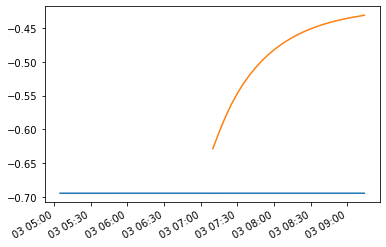

MSE of this prediction is: 0.0458937325586436
Epoch 2 / 1000
Average loss for the batches in the epoch: 0.24037927646804746
Epoch time is 13.314884424209595 seconds.
Plotting prediction for some random sample in the test set.


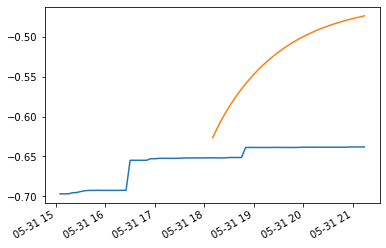

MSE of this prediction is: 0.015360387074071117
Epoch 3 / 1000


In [ ]:
tb = bench.TestBench(
    class_to_test=lstm.LSTMTester,
    metrics_and_apps_to_test=[("node_mem", "moc/smaug")],
    path_to_data="./data/"
)
tb.run_training_and_tests()